<a href="https://colab.research.google.com/github/GoPlusUltra/Bike-Sharing-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin-1')

Getting the gist of the data.

In [4]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


From Seeing this data, what questions can we ask??
1. How holidays are impacting to rent bike?
2. We have the 01/12/2017 to 30/11/2018 data on hourly basis. So how the daytime and night time impacting on our output?
We need to sum all hourly data and plot a graph.
3. What is season wise output??
4. How snowfall affecting our customers?
5. How Rainfall affecting our customers?
6. If there is less visibility then our count should go ideally down. We need to find what our data is showing us.
7. what our count on Functoning day and vice versa.
8. how temperature is affecting on our bike renting count?
9. We need HeatMap for finding the co relation between our variables. So that we can drop highly corelated variables at the time of applying machine regression algorithm.

We find each answer and will try to find trend.

So Lets Hop On..

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


1. How holidays are impacting to rent bike? **Done**
2. We have the 01/12/2017 to 30/11/2018 data on hourly basis. So how the daytime and night time impacting on our output?
We need to sum all hourly data and plot a graph.
3. What is season wise output?? **Done**
4. How snowfall affecting our customers? **Done**
5. How Rainfall affecting our customers? **Done**
6. If there is less visibility then our count should go ideally down. We need to find what our data is showing us.
7. what our count on Functoning day and vice versa.
8. how temperature is affecting on our bike renting count? **Done**
9. We need HeatMap for finding the co relation between our variables. So that we can drop highly corelated variables at the time of applying machine regression algorithm.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We are cool as we dont have any null values. We are ready to go on quest then..

First we will do Exploratory Data Analysis.

# Finding how the holidays are impacting on bike sharing count.

In [8]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [96]:
sns.set_style('darkgrid')

Text(0.5, 12.199999999999974, 'Day Type')

<Figure size 1080x576 with 0 Axes>

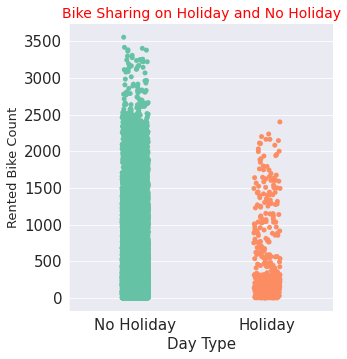

In [98]:
plt.figure(figsize=(15,8))
sns.catplot(x='Holiday',y='Rented Bike Count',data=df,palette='Set2')
plt.title('Bike Sharing on Holiday and No Holiday',color='r',fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=13)
plt.xlabel('Day Type',fontsize=15)


In [10]:
mean_count_on_daytype=df.groupby(['Holiday'])['Rented Bike Count'].mean()
print('mean demand of Bike Sharing on holiday is:',mean_count_on_daytype['Holiday'])
print('mean demand of Bike Sharing on no holiday is:',mean_count_on_daytype['No Holiday'])



mean demand of Bike Sharing on holiday is: 499.75694444444446
mean demand of Bike Sharing on no holiday is: 715.2280259365995


The bike sharing demand on Holiday is not as much as on No Holiday.  Thus we can see people dont share the bikes on holidays more often.

Also, The maximum count for No Holiday goes upto 3500. In case of Holiday which is around 2000.

The  demand of Bike on Holiday limits less than 500 as the area covered by dots on the plot is less.

Try to find individual total count using for loop.
Below code isnt working.


In [11]:
for i in df['Holiday']:               #Junk
  if i =='Holiday':
    total_count_on_holiday=df['Rented Bike Count'].sum()
  else:
    total_count=df['Rented Bike Count'].sum()
print('total count on No holiday is',total_count)
print('total count on holiday is',total_count_on_holiday)




total count on No holiday is 6172314
total count on holiday is 6172314


# Lets find how much share of total rides are taken on No Holiday..

In [12]:
total_count_on_daytype=df.groupby(['Holiday'])['Rented Bike Count'].sum()
print('Total rides on Holidays are ',total_count_on_daytype['Holiday'])  
print('Total rides on No Holidays are ',total_count_on_daytype['No Holiday'])

Total rides on Holidays are  215895
Total rides on No Holidays are  5956419


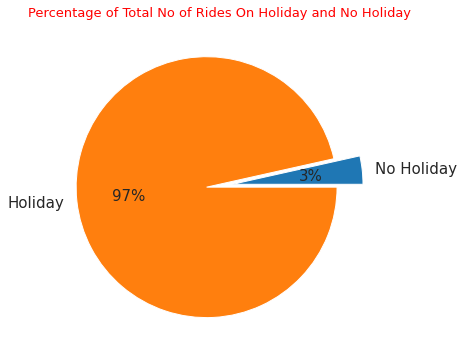

In [30]:
plt.figure(figsize=(6,6))
explode=(.1,.1)
labels="No Holiday","Holiday"
plt.pie(total_count_on_daytype, autopct='%.0f%%',explode=explode,labels=labels)
plt.title('Percentage of Total No of Rides On Holiday and No Holiday',color='r', fontsize=13)
plt.rcParams.update({'font.size': 15})

We can see the 97% of the rides from  01/12/2017 to 30/11/2018 are taken on No Holiday.

In [ ]:
df['Functioning Day'].value_counts() #junk

Yes    8465
No      295
Name: Functioning Day, dtype: int64

# How the demand of the bikes shows variation on different hours of the day time?

In [37]:
hourly_analysis = df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
hourly_analysis.head()

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


Text(0.5, 1.0, 'Rented Bike Analysis by Hour')

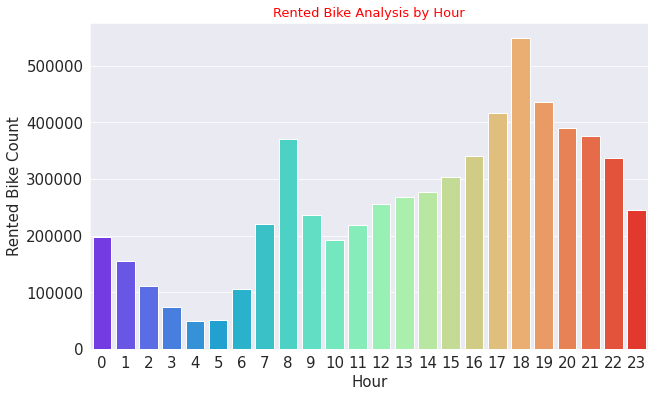

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=hourly_analysis,palette='rainbow')
plt.title('Rented Bike Analysis by Hour',color='r', fontsize=13)


As we can see demand for vehicles decreases at night drastically and increases gradually from 6 Hour.

# Bike Rental insights from each season

In [48]:
season_wise_analysis=df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
season_wise_analysis

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


Text(0.5, 1.0, 'Seasonwise Bike Rental Counts')

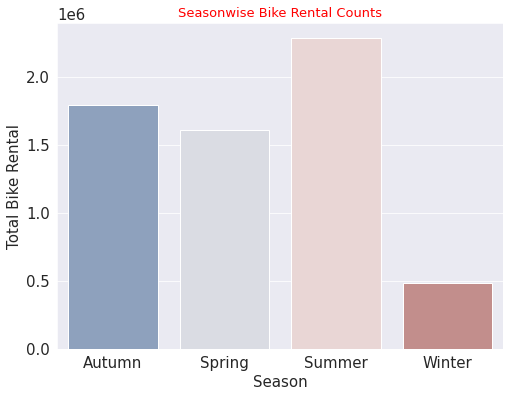

In [64]:
plt.figure(figsize=(8,6))
plot=sns.barplot(x='Seasons',y='Rented Bike Count',data=season_wise_analysis,palette='vlag')
ylabels = ['{:,.2f}'.format(y) + 'K' for y in plot.get_yticks()/1000]

plt.xlabel('Season')
plt.ylabel('Total Bike Rental')
plt.title('Seasonwise Bike Rental Counts',color='r', fontsize=13)

We can see that demand in winter is too less than other Seasons. Cause obvious resaon is people prefer Cars to avoid cold.

# **IMP** Import datetime and sumup the bike renting in each month and draw line plot.

In [ ]:
new_df=df['Date'].apply(lambda x : datetime.strptime(x,'%d/%m/%y'))

# How is Snowfall and Rainfall are affecting bike rental?

In [82]:
snowfall_analysis=df.groupby(['Snowfall (cm)'])['Rented Bike Count'].sum().reset_index()
snowfall_analysis.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


As we are expecting, **Bike Rental is maximum for '0'cm Snowfall**. But Its a huge Outlier for our analysis. So excluding that data we will analysis the remaining data.

Text(0.5, 1.0, 'Effect of Snowfall on bike rental')

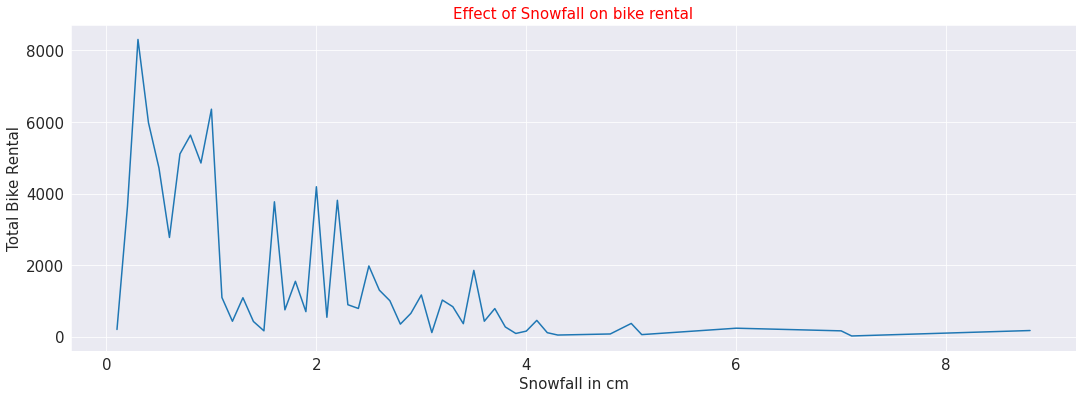

In [92]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=snowfall_analysis[1:] )
plt.xlabel('Snowfall in cm')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Snowfall on bike rental',color='r', fontsize=15)

In [88]:
rainfall_analysis=df.groupby(['Rainfall(mm)'])['Rented Bike Count'].sum().reset_index()
rainfall_analysis.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


We are excluding the data at no Rainfall cause similar reason as no Snowfall day.

Text(0.5, 1.0, 'Effect of Rainfall on bike rental')

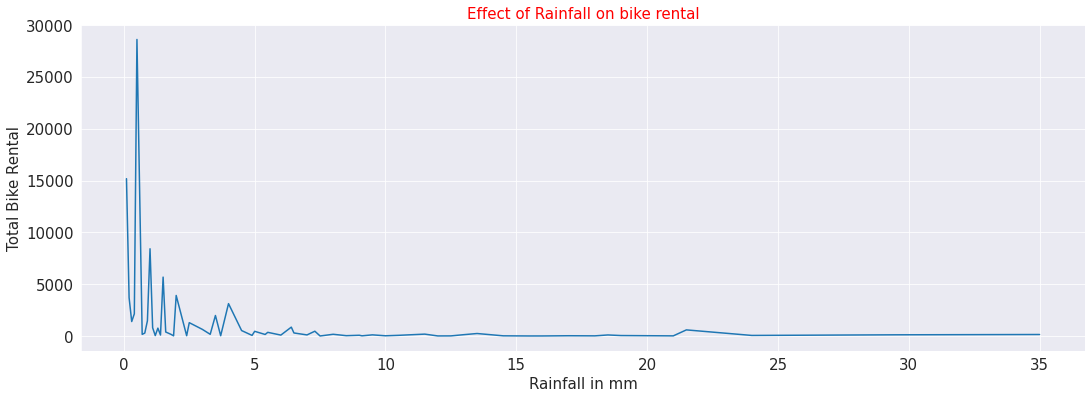

In [93]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=rainfall_analysis[1:] )
plt.xlabel('Rainfall in mm')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Rainfall on bike rental',color='r', fontsize=15)

At No Rainfall and No Snowfall day demand is as expected is Maximum.

There is slight demand for bikes when Snowfall is less than 4cm and almost no demand after that.

In case of Rainfall, we can see when there is more rain than 5mm there is almost no demand for Bikes.

# Effect of Temprature on Bike Rental.

In [99]:
Temperature_analysis=df.groupby(['Temperature(°C)'])['Rented Bike Count'].sum().reset_index()
Temperature_analysis.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


Text(0.5, 1.0, 'Effect of Temperature on bike rental')

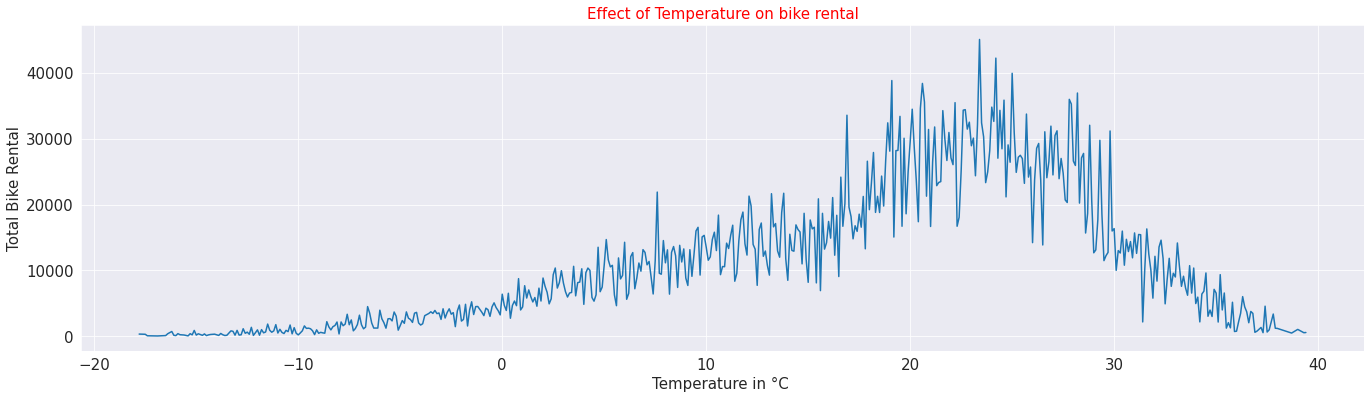

In [101]:
plt.figure(figsize=(23,6))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=Temperature_analysis )
plt.xlabel('Temperature in °C ')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Temperature on bike rental',color='r', fontsize=15)

We can see the Bike rental sum is somewhat normally distributed around Temperature 23°C, if we neglect outliers.

In [ ]:
temp_df=df.drop('Date')
sns.heatmap(data=temp_df)

In [ ]:
# create a copy of the dataframe, and add columns for month and year           #Extra Work
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()